# Hardwork Pays Off

# Section 1 - importing all dependencies

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# configuring the size of the our plot and setting the theme of plot 
plt.figure(figsize = (12,9))
plt.style.use('tableau-colorblind10')


<Figure size 960x720 with 0 Axes>

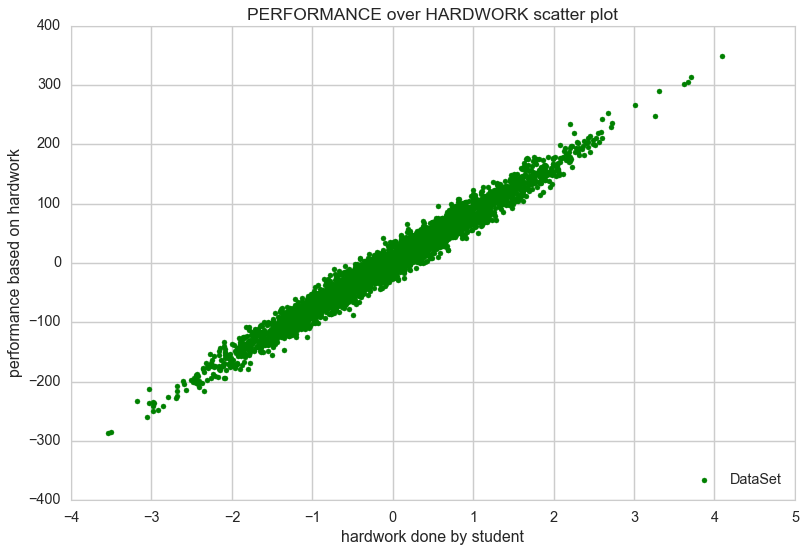

In [88]:

X = pd.read_csv('Linear_X_Train.csv').to_numpy()
y = pd.read_csv('Linear_Y_Train.csv').to_numpy()
plt.xlabel('hardwork done by student')
plt.ylabel('performance based on hardwork')
plt.title('PERFORMANCE over HARDWORK scatter plot')
plt.scatter(X,y, color = 'green',label = 'DataSet')
plt.legend(loc = "lower right")
plt.show()

# Section 2. Defining Required Functions

In [99]:
def hypothesis(x,theta):
    #here theta = theta[0] or c ,theta[1] or m ,where y = mx+c
    y_ = theta[0] + theta[1] * x
    return y_

# this functions is used to find the partial derivates
#grad[0] = will represent the partial derivative of loss function w.r.t theta[0]
#grad[1] = will represent the partial derivative of loss function w.r.t theta[1]
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    
    return grad/m

# this will used find the error in the predicted value over actual value
def error(X,Y,Theta):
    m = X.shape[0]
    theta = np.zeros((2,))
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error +=  (y_ - Y[i]) ** 2
        
    return total_error/m

# used to optimized the regression line to get the best fit
def gradientDescent(X,Y, learning_rate = 0.1, max_steps = 100):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
    
    return theta,error_list        

In [100]:
# calcluating the theta and error_list by our trained value
theta,error_list = gradientDescent(X,y)
#calculating predicted value of y
y_ = hypothesis(X,theta)

# Section 3. Applying Test Cases

In [101]:
# importing the test_case file using pandas and converting into the numpy array
X_test = pd.read_csv('Linear_X_Test.csv').to_numpy()
#calculating the value of y_test case using our above finctions
y_test = hypothesis(X_test,theta)

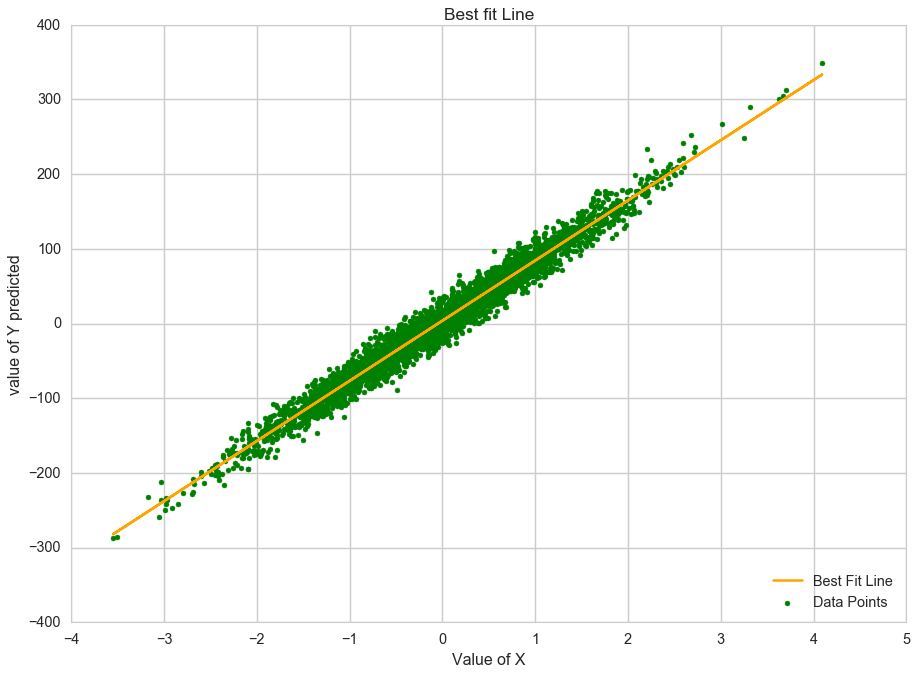

In [102]:
plt.figure(figsize = (12,9))
plt.scatter(X,y,color = "green",label = "Data Points")
plt.plot(X,y_,color = "orange",label = "Best Fit Line")
plt.legend(loc = "lower right")
plt.xlabel('Value of X')
plt.ylabel('value of Y predicted')
plt.title('Best fit Line')
plt.show()
    


In [103]:
#saving the file in csv format
df = pd.DataFrame(data = y_test, columns =["y"])
df.to_csv("y_prediction.csv",index = False)

## Section-4 Calculating the R-Sqaured or Determination of Coefficient

In [104]:
def r2_score(Y,Y_):
    num = np.sum((Y -Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = (1-num/denom)
    return score*100

In [105]:
#this will print the score of our code out of 100, how much our code is optimized
r2_score(y,y_)

97.09612220841039